In [53]:

#Libraries

import plotly.express as px
import pandas as pd
from darts import TimeSeries
from darts.models import ExponentialSmoothing, Prophet

In [89]:
import datetime
datetime.datetime.now()

datetime.datetime(2024, 5, 31, 10, 39, 21, 721347)

In [119]:
df=pd.read_csv('archive/DL001.csv',parse_dates=['From Date'],index_col=['From Date'])
df.head()

,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3)
From Date,,,,,,,,,,,
2010-01-01 00:00:00,2010-01-01 01:00:00,NaN,NaN,21.02,41.00,38.75,NaN,4.27,4.43,3.0,NaN
2010-01-01 01:00:00,2010-01-01 02:00:00,NaN,NaN,9.12,29.50,23.25,NaN,4.55,3.69,3.5,NaN
2010-01-01 02:00:00,2010-01-01 03:00:00,NaN,NaN,10.48,27.25,23.25,NaN,4.62,3.68,3.5,NaN
2010-01-01 03:00:00,2010-01-01 04:00:00,NaN,NaN,6.50,24.25,18.25,NaN,4.52,3.11,4.0,NaN
2010-01-01 04:00:00,2010-01-01 05:00:00,NaN,NaN,5.75,21.50,16.25,NaN,4.70,2.80,4.0,NaN


In [112]:
df.columns

Index(['From Date', 'To Date', 'PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)',
       'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)',
       'Ozone (ug/m3)', 'Benzene (ug/m3)'],
      dtype='object')

In [113]:
df['To Date']

0         2010-01-01 01:00:00
1         2010-01-01 02:00:00
2         2010-01-01 03:00:00
3         2010-01-01 04:00:00
4         2010-01-01 05:00:00
                 ...         
116107    2023-03-31 20:00:00
116108    2023-03-31 21:00:00
116109    2023-03-31 22:00:00
116110    2023-03-31 23:00:00
116111    2023-04-01 00:00:00
Name: To Date, Length: 116112, dtype: object

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116112 entries, 0 to 116111
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   From Date        116112 non-null  datetime64[ns]
 1   To Date          116112 non-null  object        
 2   PM2.5 (ug/m3)    76836 non-null   float64       
 3   PM10 (ug/m3)     45000 non-null   float64       
 4   NO (ug/m3)       85620 non-null   float64       
 5   NO2 (ug/m3)      85650 non-null   float64       
 6   NOx (ppb)        87090 non-null   float64       
 7   NH3 (ug/m3)      62229 non-null   float64       
 8   SO2 (ug/m3)      74992 non-null   float64       
 9   CO (mg/m3)       63170 non-null   float64       
 10  Ozone (ug/m3)    76221 non-null   float64       
 11  Benzene (ug/m3)  37609 non-null   float64       
dtypes: datetime64[ns](1), float64(10), object(1)
memory usage: 10.6+ MB


In [95]:
df.describe()

,From Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3)
count,116112,76836.000000,45000.000000,85620.000000,85650.000000,87090.000000,62229.000000,74992.00000,63170.000000,76221.000000,37609.000000
mean,2016-08-15 23:30:00,126.521225,189.108962,43.677767,58.211260,64.744833,58.575492,11.20836,2.189681,29.268231,6.927384
min,2010-01-01 00:00:00,0.250000,1.250000,0.030000,0.100000,0.000000,0.030000,0.02000,0.000000,0.020000,0.000000
25%,2013-04-24 11:45:00,54.250000,97.500000,10.250000,23.970000,24.000000,19.790000,4.42000,1.000000,9.130000,0.790000
50%,2016-08-15 23:30:00,95.250000,162.750000,20.580000,40.200000,39.920000,33.680000,7.62000,1.580000,18.750000,2.880000
75%,2019-12-08 11:15:00,167.500000,250.750000,45.000000,69.500000,73.170000,73.900000,13.65000,2.460000,38.630000,8.590000
max,2023-03-31 23:00:00,991.500000,1000.000000,499.350000,499.200000,499.900000,497.850000,196.65000,50.000000,199.750000,233.060000
std,NaN,103.332900,125.074639,63.839288,58.518263,72.535712,66.292290,11.77704,3.153951,29.545145,11.239515


In [115]:
#df_ts=df.set_index('From Date')
df_ts=df.drop(labels='To Date',axis=1)
df_ts

,From Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3)
0,2010-01-01 00:00:00,NaN,NaN,21.02,41.00,38.75,NaN,4.27,4.43,3.00,NaN
1,2010-01-01 01:00:00,NaN,NaN,9.12,29.50,23.25,NaN,4.55,3.69,3.50,NaN
2,2010-01-01 02:00:00,NaN,NaN,10.48,27.25,23.25,NaN,4.62,3.68,3.50,NaN
3,2010-01-01 03:00:00,NaN,NaN,6.50,24.25,18.25,NaN,4.52,3.11,4.00,NaN
4,2010-01-01 04:00:00,NaN,NaN,5.75,21.50,16.25,NaN,4.70,2.80,4.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
116107,2023-03-31 19:00:00,26.50,57.00,34.45,49.45,54.32,66.48,7.00,0.82,10.35,6.95
116108,2023-03-31 20:00:00,26.25,60.25,37.92,64.83,65.30,56.25,6.93,1.15,5.03,7.81
116109,2023-03-31 21:00:00,31.25,74.00,40.80,68.10,69.43,67.85,6.88,0.93,8.68,5.04
116110,2023-03-31 22:00:00,25.00,53.25,42.40,66.15,69.65,77.47,6.97,0.74,10.47,3.57


# Darts Library

In [117]:
series_co= df_ts[['From Date','CO (mg/m3)']]
series_co

,From Date,CO (mg/m3)
0,2010-01-01 00:00:00,4.43
1,2010-01-01 01:00:00,3.69
2,2010-01-01 02:00:00,3.68
3,2010-01-01 03:00:00,3.11
4,2010-01-01 04:00:00,2.80
...,...,...
116107,2023-03-31 19:00:00,0.82
116108,2023-03-31 20:00:00,1.15
116109,2023-03-31 21:00:00,0.93
116110,2023-03-31 22:00:00,0.74


In [98]:
series_co.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 116112 entries, 2010-01-01 00:00:00 to 2023-03-31 23:00:00
Series name: CO (mg/m3)
Non-Null Count  Dtype  
--------------  -----  
63170 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


In [118]:
#resample to eliminate the 46% missing values

series_co=series_co.resample('60min',label='right',closed='right').mean().dropna()
series_co

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [100]:
df_co=series_co.reset_index()
df_co.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63170 entries, 0 to 63169
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   From Date   63170 non-null  datetime64[ns]
 1   CO (mg/m3)  63170 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 987.2 KB


In [80]:
#df_co=df_co.set_index('To Date')

In [102]:
series= TimeSeries.from_dataframe(df_co,'From Date','CO (mg/m3)',fill_missing_dates=True, freq='H')
train, val=series[:-5000],series[-5000:]

/home/j/Desktop/Air_quality_India_kaggle/venv/lib/python3.10/site-packages/darts/timeseries.py:4736: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled_time_index = resampled_time_index.asfreq(freq)


In [103]:
model=ExponentialSmoothing()
model.fit(train)
prediction=model.predict(len(val))

/home/j/Desktop/Air_quality_India_kaggle/venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [104]:
import matplotlib.pyplot as plt

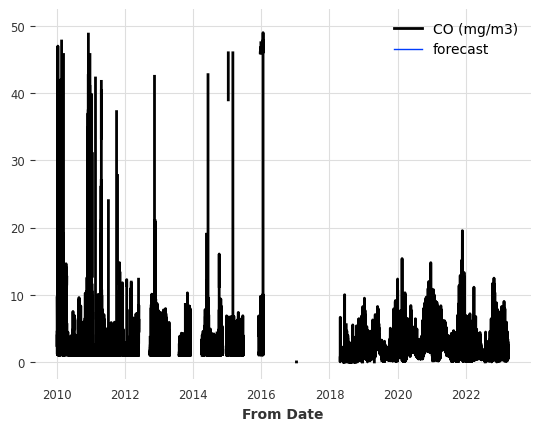

In [108]:
series.plot()
prediction.plot(label='forecast',lw=1)
plt.legend()